In [4]:
# Install libraries
import pandas as pd
import numpy as np
import statsmodels

import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy 
from scipy.stats import mannwhitneyu, fisher_exact, ttest_ind

import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.graphics.mosaicplot import mosaic
%matplotlib inline

plt.rcParams['figure.figsize'] = (8.0, 7.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


print("libraries installed succesfully!")

libraries installed succesfully!


In [20]:
# load dataset
df = pd.read_csv('Soils.csv', encoding = 'unicode_escape')
df.head()

,Unnamed: 0,Group,Contour,Depth,Gp,Block,pH,N,Dens,P,Ca,Mg,K,Na,Conduc
0,1,1,Top,0-10,T0,1,5.40,0.188,0.92,215,16.35,7.65,0.72,1.14,1.09
1,2,1,Top,0-10,T0,2,5.65,0.165,1.04,208,12.25,5.15,0.71,0.94,1.35
2,3,1,Top,0-10,T0,3,5.14,0.260,0.95,300,13.02,5.68,0.68,0.60,1.41
3,4,1,Top,0-10,T0,4,5.14,0.169,1.10,248,11.92,7.88,1.09,1.01,1.64
4,5,2,Top,30-Oct,T1,1,5.14,0.164,1.12,174,14.17,8.12,0.70,2.17,1.85


## One-Way Anova : Relationship between soil PH and depth

In [6]:
mod = ols('pH~Depth', data = df). fit()

# Analysis of variance (one-way)

aov = sm.stats.anova_lm(mod, type = 2)
print(aov)

            df     sum_sq   mean_sq          F        PR(>F)
Depth      3.0  14.958973  4.986324  35.068327  9.810893e-12
Residual  44.0   6.256308  0.142189        NaN           NaN


#### We see that the p-vale (PR )for depth is 9.81e-12 is << 0.05 hence we can reject the null hypothesis that there is no relatioship between soil PH and depth. Hence there is relationship between soil PH and depth.

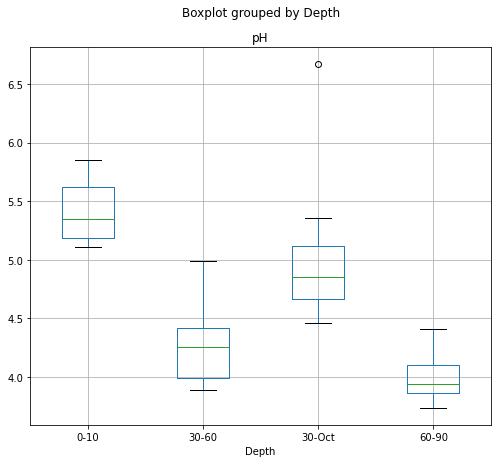

In [11]:
# Let us confirm this
df1 = df[['Depth', 'pH']]


# box plot for marks column
df1.boxplot(column='pH', by = 'Depth')
plt.show()



## Two-Way ANova : Relationship between soil PH and dept & Contour

In [14]:
mod1 = ols('pH~Depth+Contour', data = df).fit()

# Analysis of variance (one-way)
aov1 = sm.stats.anova_lm(mod1, type = 2)
print(aov1)

            df     sum_sq   mean_sq          F        PR(>F)
Depth      3.0  14.958973  4.986324  34.929618  1.736182e-11
Contour    2.0   0.260662  0.130331   0.912981  4.091423e-01
Residual  42.0   5.995646  0.142753        NaN           NaN


#### We see that the p-vale (PR )for contour is 4.09e-1 is >> 0.05 hence we cannot reject the null hypothesis that there is no relatioship between soil PH and contour. Hence there is no relationship between soil PH and contour.

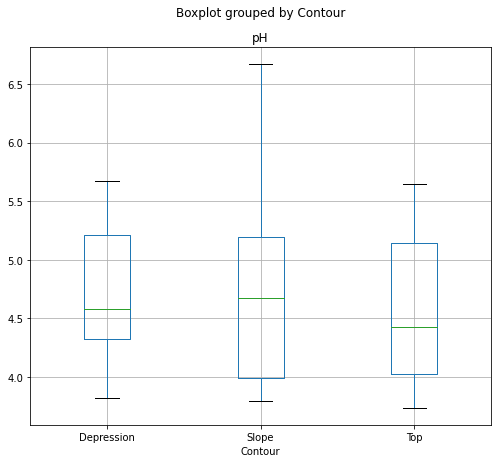

In [16]:
# Let us confirm this by a box plot for Contour column
df.boxplot(column='pH', by = 'Contour')
plt.show()


## Two-Way Anova : Relationship between soil PH and dept & Block ( Including interaction term)

In [17]:
mod1 = ols('pH~Depth+Block+Depth*Block', data = df).fit()

# Analysis of variance (one-way)
aov1 = sm.stats.anova_lm(mod1, type = 2)
print(aov1)

               df     sum_sq   mean_sq          F        PR(>F)
Depth         3.0  14.958973  4.986324  37.786849  9.459884e-12
Block         1.0   0.796954  0.796954   6.039393  1.842085e-02
Depth:Block   3.0   0.180985  0.060328   0.457173  7.137201e-01
Residual     40.0   5.278370  0.131959        NaN           NaN


#### We see that the p-vale (PR )for depth and block is  is << 0.05 hence we can reject the null hypothesis that there is no relatioship between soil PH and depth and block. Hence there is relationship between soil PH and depth and block. Th einteraction term is however not stat significant.

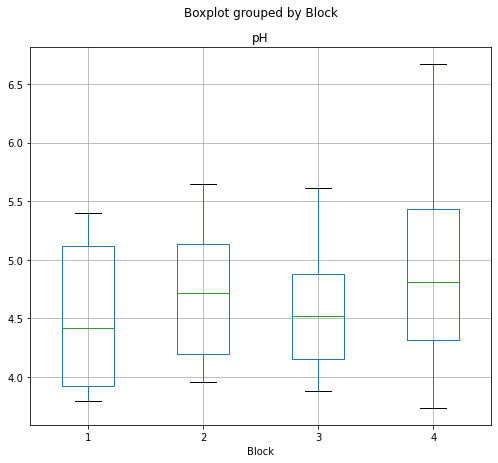

In [18]:
# Let us confirm this by a box plot for Contour column
df.boxplot(column='pH', by = 'Block')
plt.show()